In this mini-course, we study topic modeling. We start with discussions on some fundamental concepts in topic modeling. Then we move on to discuss the concept of lexical relations and semantic similarity. Lastly, we go on the journey of studying  one of the most foundational algorithms of topic modeling here: latent semantic analysis (LSA). In this lecture, we focus on NLTK package. In the future, we will study the Gensim package, which is another powerful tool for NLP tasks.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import os
import nltk
import string
import warnings
import re

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk.corpus import wordnet as wn

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from matplotlib.pyplot import figure

%matplotlib inline

#### I. Topic Modeling Overview

Topic modeling is an unsupervised machine learning technique that is capable of scanning a set of documents, detecting words and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents. Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. By detecting patterns such as word frequencies and 'distances' between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. 

Topic modeling is different from topic classification, where the former is by nature unsupervised whereas the latter is supervised. For supervised learning algorithms for topic classification (e.g. sentiment analysis), there are a variety of algorithms/libraries that can be used, for example, naive Bayes models (NB) and support vector machines (SVM) etc. Much of the topic modeling and classification tasks involve feature engineering, and how we transform texts into numbers really dictates what our final results would look like. Many modern topic classification tasks usually perform well under the neural network framework. 

Majority of the topic modeling algorithms can be broken down into two steps: 1) obtaining a list of the topics covered by the documents in the corpus, and 2) obtaining several sets of documents from the corpus grouped by the topics they cover. The underlying assumption here is that every document comprises a statistical mixture of topic, that is, a statistical distribution of topics that can be obtained by 'adding up' (in some way) all of the distributions for all the topics covered. 

Topic modeling algorithms can also be categorized based on whether the algorithm uses neural network models. Techniques such as word embedding certainly require a neural network structure imposed on the model. In this mini-lecture, we only focus on algorithms that are not based on neural networks. 

In [6]:
warnings.filterwarnings("ignore")

# path="C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets"
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

Topic modeling falls into the realm of natural language processing (NLP) in machine learning. There are many Python packages that can handle this type of tasks. To name a few, NLTK, Gensim, TensorFlow or PyTorch etc. are all very powerful packages. Here in this mini-lecture, we focus on NLTK. Once neural network models are systematically studied, we will visit those packages built for deep learning such as Gensim and TensorFlow. 

#### II. Some Basic Concepts in NLP

We first go over some basic notions in NLP. A **(text) corpus** is a large body of texts. Many corpora are designed to contain a careful balance of material in one or more genres. In some Python implementation packages (such as Gensim), the elements of a corpus is called a **document**. Documents consist of words, punctuations, phrases, sentences, and paragraphs etc., including special characters things like '@-%'. Think of a text corpus as a collection of sets (so a corpus is a family set), and each set within a corpus is a document. Within each document, various forms of texts are elements. So an example of a text corpus is the _Journal of Econometrics_, and each article within that is a document.

The package NLTK has many built in corpora. For example, NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25000 free electronic books, hosted at http://www.gutenberg.org/. We begin by getting the Python interpreter to load the NLTK package, then ask to see nltk.corpus.gutenberg.fileids(), the file identifiers in this corpus:

In [6]:
gutenberg_filename_list=gutenberg.fileids() # or we can write it as "gutenberg_filename_list=nltk.corpus.gutenberg.fileids()"
print(gutenberg_filename_list)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Let's pick out the first of these texts — Emma by Jane Austen — and give it a short name, emma, then find out how many words it contains:

In [7]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
print(type(emma))
print(len(emma))
print(emma[100:200]) # taking a quick look at the sample of the text

<class 'nltk.text.Text'>
192427
['mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', ',', 'who', 'had', 'fallen', 'little', 'short', 'of', 'a', 'mother', 'in', 'affection', '.', 'Sixteen', 'years', 'had', 'Miss', 'Taylor', 'been', 'in', 'Mr', '.', 'Woodhouse', "'", 's', 'family', ',', 'less', 'as', 'a', 'governess', 'than', 'a', 'friend', ',', 'very', 'fond', 'of', 'both', 'daughters', ',', 'but', 'particularly', 'of', 'Emma', '.', 'Between', '_them_', 'it', 'was', 'more', 'the', 'intimacy', 'of', 'sisters', '.', 'Even', 'before', 'Miss', 'Taylor', 'had', 'ceased', 'to', 'hold', 'the', 'nominal', 'office', 'of', 'governess', ',']


To study texts, we usually need to tokenize them. By taking a quick peek at the data above, it seems like the corpus has already been well-arranged and the document has been tokenized (into words and punctuations and special characters). So we will skip the tokenization step for this example.

A **concordance** view shows us every occurrence of a given word, together with some context. A concordance permits us to see words in context. For example, we saw that the word _monstrous_ occurred in contexts such as _the monstrous pictures_ and _a monstrous size_. What other words appear in a similar range of contexts? We can find out by appending the term 'similar' to the name of the text in question, then inserting the relevant word in parentheses. A concordance sometimes help us shed lights on how we can discover **collocations**, which is an expression consisting of two or more words that correspond to some conventional way of saying things. Thus _red wine_ is a collocation, whereas _the wine_ is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, _maroon wine_ sounds definitely odd.

In [8]:
emma.similar("girl")

man woman manner little friend situation day time visit look question
word person blush moment crowd home world house family


In [9]:
emma.concordance("romance") # this is not case-sensitive

Displaying 2 of 2 matches:
ar of Wakefield . He never read the Romance of the Forest , nor The Children of
s . He has not been able to get the Romance of the Forest yet . He was so busy 


This gives us all the contexts around the word 'romance' in the text. Another good way of examining the data is to calculate the lexical-diversity-score, which is defined as the unique number of elements of the texts divided by the number of elements of the texts. If the number is very high, then that means the author has a very large vocabulary.

In [10]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

lexical_diversity(emma)

0.04059201671283136

There are other text corpora in the NLTK package, and many corpora have been used for different tasks. For example, the Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as **stylistics**. Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre:

In [11]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ') # the argument 'end' is used in order for print() to put its output on a single line

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions. In many cases, examining certain words and its associated features can tell us a lot about underlying topics we want to mine:

In [12]:
cfd = nltk.ConditionalFreqDist((genre, word)
                               for genre in brown.categories()
                               for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Let's find out the average length of a sentence in the news section of the Brown Corpus. The map() function is a higher-order function in Python which applies a function to every item in a sequence. 

In [13]:
brown_corpus_sents=nltk.corpus.brown.sents(categories='news')
print(brown_corpus_sents[23])

['The', 'jury', 'did', 'not', 'elaborate', ',', 'but', 'it', 'added', 'that', '``', 'there', 'should', 'be', 'periodic', 'surveillance', 'of', 'the', 'pricing', 'practices', 'of', 'the', 'concessionaires', 'for', 'the', 'purpose', 'of', 'keeping', 'the', 'prices', 'reasonable', "''", '.']


In [14]:
lengths = list(map(len, brown_corpus_sents)) # same as the command (commented out) below
# lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

Another existing corpus is the US presidential inauguration corpus, which contains all the texts of the presidential speech during their inauguration every 4 years. An interesting property of this collection is its time dimension indicated by the file names:

In [15]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

Let's generate a 'DataFrame' object based on the inaugural address text corpus. We will also compute the length of each text as well as the lexical-diversity score:

In [16]:
data={'Filename':[fl.lower() for fl in inaugural.fileids()], 
      'speech': [inaugural.raw(l).lower() for l in inaugural.fileids()], 
      'period': [fl[0:4] for fl in inaugural.fileids()]}
df = pd.DataFrame(data) 
df['text length']=df['speech'].apply(len)
df['lexical diversity']=df['speech'].apply(lexical_diversity)
df.tail()

,Filename,speech,period,text length,lexical diversity
51,1993-clinton.txt,"my fellow citizens, today we celebrate the mys...",1993,9114,0.004060
52,1997-clinton.txt,my fellow citizens: at this last presidential ...,1997,12250,0.003347
53,2001-bush.txt,"president clinton, distinguished guests and my...",2001,9053,0.004198
54,2005-bush.txt,"vice president cheney, mr. chief justice, pres...",2005,12018,0.003162
55,2009-obama.txt,my fellow citizens:\n\ni stand here today humb...,2009,13439,0.002679


Next, let's get the President's name. Notice that the 'Filename' field follows the convention of _year-president.txt_. To get the middle part we will try to treat both "-" as well as "." as delimiters. We will then split the text into 3 parts and then only keep the 2nd part. Below is an example:

In [17]:
delimiters = "-", "."
example = "2005-bush.txt"
regexPattern = '|'.join(map(re.escape, delimiters))
re.split(regexPattern, example)

['2005', 'bush', 'txt']

In [18]:
def get_president(s): # assigning multiple delimiter for str.split() method
    delimiters = "-", ".";
    regexPattern = '|'.join(map(re.escape, delimiters))
    substr_list=re.split(regexPattern, s)
    return substr_list[1]

df['President Name']=df['Filename'].apply(get_president)
df.head()

,Filename,speech,period,text length,lexical diversity,President Name
0,1789-washington.txt,fellow-citizens of the senate and of the house...,1789,8619,0.004409,washington
1,1793-washington.txt,"fellow citizens, i am again called upon by the...",1793,791,0.041719,washington
2,1797-adams.txt,"when it was first perceived, in early times, t...",1797,13877,0.002594,adams
3,1801-jefferson.txt,friends and fellow citizens:\n\ncalled upon to...,1801,10137,0.003453,jefferson
4,1805-jefferson.txt,"proceeding, fellow citizens, to that qualifica...",1805,12908,0.002634,jefferson


Now let's look at word count. Specifically, we want to know how American Presidents view the core values of liberty and democracy:

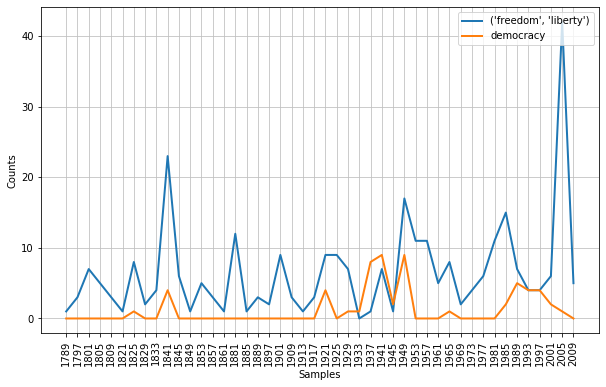

In [19]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                               for fileid in inaugural.fileids()
                               for w in inaugural.words(fileid)
                               for target in [('freedom', 'liberty'), ('democracy')]
                               if w.lower().startswith(target))
figure(figsize=(10, 6))
cfd.plot()

We have seen some standard NLTK corpora. So let's see some special ones now. From a utility standpoint; it includes some corpora that are nothing more than word lists. Although these corpora are rarely studied on its own, it's often helpful to use them in conjunction with other NLP task. For example, the most useful one is the stopwords corpus:

In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Another useful corpus is the 'Names' corpus, containing 8000 first names categorized by gender. The male and female names are stored in separate files:

In [21]:
first_names = names
print(first_names.fileids())

male_names = names.words('male.txt')
female_names = names.words('female.txt')
neutral_names=[w for w in male_names if w in female_names] # finding names that can be both male or female
print(neutral_names[0:10])

['female.txt', 'male.txt']
['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie']


Lastly, keep in mind the purpose of a program module is to bring logically-related definitions and functions together in order to facilitate re-use and abstraction. Python modules are nothing more than individual ".py" files. The NLTK package follows the same rule as bove. Given the complexity of the package, in many times we will want to look at the source code. We can locate the code for any NLTK module on our system using the dunder \__file\__ variable, e.g.:

In [22]:
nltk.metrics.__file__ # this returns the location of the compiled Python file for the module

'C:\\Users\\pgao\\anaconda3\\envs\\myenv\\lib\\site-packages\\nltk\\translate\\metrics.py'

#### III. Lexical Relations and Semantic Similarity

When it comes to topic modeling. One of the issue we have to deal with is synonyms as well as semantic similarity. This is where NLTK can kick in and help one more time. In NLTK, WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with more than 150,000 words and more than 117,000 synonym sets. Consider the sentence in 1) below:

   1. Benz is credited with the invention of the _motorcar_.
   2. Benz is credited with the invention of the _automobile_.

If we replace the word _motorcar_ in 1) by _automobile_, to get 2), the meaning of the sentence stays pretty much the same.

We can explore these words with the help of WordNet:

In [23]:
# from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, _motorcar_ has just one possible meaning and it is identified as "car.n.01", the first noun sense of car. The entity "car.n.01" is called a **synset**, or **synonym set**, a collection of synonymous words (or lemmas).

In [24]:
wn.synset('car.n.01').lemma_names() # reverse lookup of synonyms

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g., the word 'car' can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:

In [25]:
print(wn.synset('car.n.01').definition(), "\n")
print(wn.synset('car.n.01').examples())

a motor vehicle with four wheels; usually propelled by an internal combustion engine 

['he needs a car to get to work']


Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as "car.n.01.automobile", "car.n.01.motorcar", and so on. This pairing of a synset with a word is called a **lemma**. We can get all the lemmas for a given synset, look up a particular lemma, get the synset corresponding to a lemma, or get the "name" of a lemma:

In [26]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [27]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [28]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [29]:
wn.lemma('car.n.01.automobile').name()

'automobile'

Unlike the word _motorcar_, which is unambiguous and has one synset, the word _car_ is ambiguous, having five synsets:

In [30]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


For convenience, we can access all the lemmas involving the word _car_ as follows:

In [31]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as _Entity_, or _Event_ — these are called **unique beginners** (or **root synsets**). Others, such as _gas guzzler_, are much more specific. WordNet makes it easy to navigate between concepts. For example, given a concept like _motorcar_, we can look at the concepts that are more specific, a.k.a. the (immediate) **hyponyms**. We can also navigate up the hierarchy by visiting **hypernyms**. Keep in mind that some words have multiple paths, because they can be classified in more than one way. 

A small portion of a concept hierarchy is illustrated below:

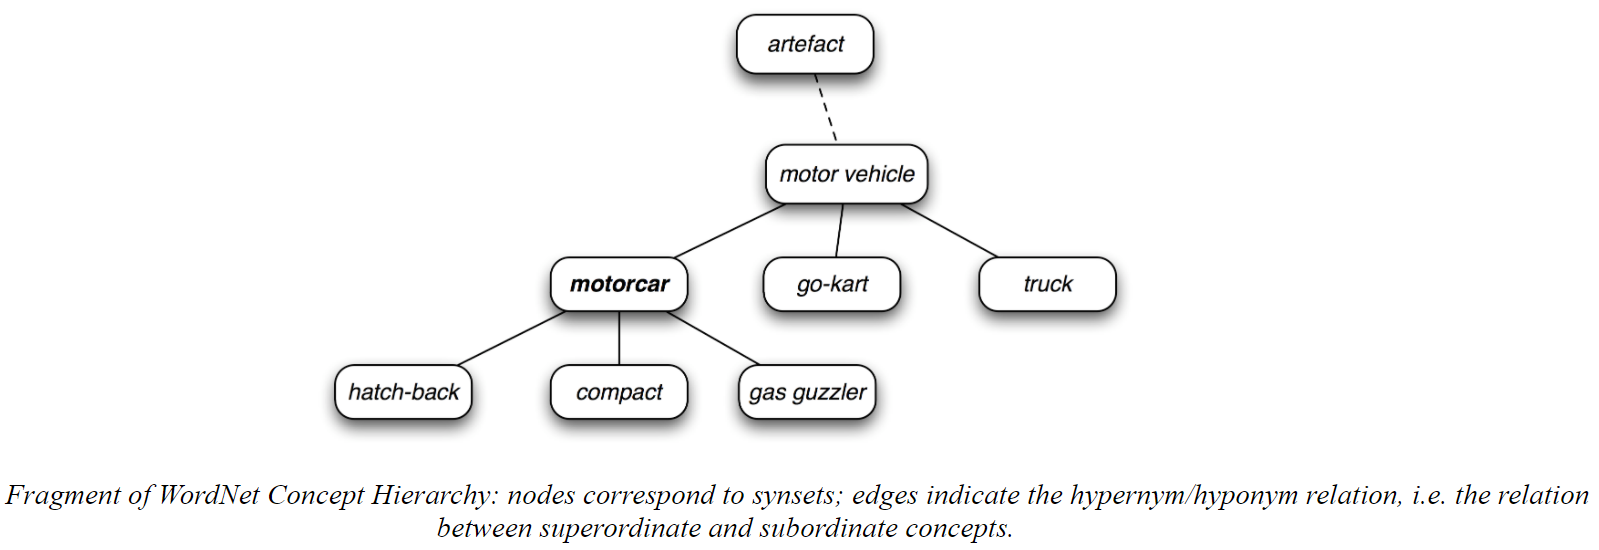

In [32]:
from IPython.display import Image
Image("WordNet tree relationship.PNG", width=500, height=500)

In [33]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms() # getting types of motorcars

print(types_of_motorcar, '\n')
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))

[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')] 

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_

Let's see another example using the word _freedom_:

In [34]:
freedom = wn.synset('freedom.n.01')
types_of_freedom = freedom.hyponyms() # getting explicit manifestation of the idea of freedom

print(types_of_freedom, '\n')
print(sorted(lemma.name() for synset in types_of_freedom for lemma in synset.lemmas()))

[Synset('academic_freedom.n.01'), Synset('civil_liberty.n.01'), Synset('enfranchisement.n.01'), Synset('free_hand.n.01'), Synset('free_rein.n.01'), Synset('freedom_of_the_seas.n.01'), Synset('independence.n.01'), Synset('liberty.n.02'), Synset('liberty.n.03'), Synset('svoboda.n.01')] 

['academic_freedom', 'blank_check', 'civil_liberty', 'enfranchisement', 'free_hand', 'free_rein', 'freedom_of_the_seas', 'independence', 'independency', 'liberty', 'liberty', 'play', 'political_liberty', 'svoboda']


Now let's navigate up the hierarchy by visiting hypernyms:

In [35]:
wn.synsets('motorcar')

[Synset('car.n.01')]

In [36]:
motorcar= wn.synset('car.n.01')
paths = motorcar.hypernym_paths()
for j in range(len(paths)):
    print([synset.name() for synset in paths[j]], "\n")

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01'] 

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01'] 



Now let's see another example:

In [37]:
wn.synsets('lion')

[Synset('lion.n.01'),
 Synset('lion.n.02'),
 Synset('leo.n.01'),
 Synset('leo.n.03')]

In [38]:
lion = wn.synset('leo.n.01')
paths = lion.hypernym_paths()
for j in range(len(paths)):
    print([synset.name() for synset in paths[j]], "\n")

['entity.n.01', 'physical_entity.n.01', 'causal_agent.n.01', 'person.n.01', 'leo.n.01'] 

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'living_thing.n.01', 'organism.n.01', 'person.n.01', 'leo.n.01'] 



We can get the most general hypernyms (or root hypernyms) of a synset as follows:

In [39]:
lion.root_hypernyms()

[Synset('entity.n.01')]

Hypernyms and hyponyms are called **lexical relations** because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**). In linguistics, **meronymy** is a semantic relation between a meronym denoting a part and a holonym denoting a whole. **Holonymy** is the converse of meronymy. In simpler terms, a meronym is in a part-of relationship with its holonym. For example, finger is a meronym of hand which is its holonym. Similarly, engine is a meronym of car which is its holonym.

Let's see an example from below. For exapmle, the parts of a tree are its trunk, crown, and so on. The substance a tree is made of includes heartwood and sapwood. A collection of trees forms a forest. This is how NLTK handles these relationships:

In [40]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [41]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [42]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

There are also relationships between verbs. For example, the act of walking involves the act of stepping, so walking entails stepping. Some verbs have multiple entailments:

In [43]:
print(wn.synset('walk.v.01').entailments())

[Synset('step.v.01')]


The field of **semantics** is the study of the meaning of words (**lexical semantics**) and fixed word combinations (**phraseology**), and how these combine to form the meanings of sentences as well as manage and resolve ambiguity. In lexical semantics, the units of analysis are lexical units which include not only words but also sub-words or sub-units such as affixes and even compound words and phrases. Lexical units include the catalogue of words in a language, the lexicon. Lexical semantics looks at how the meaning of the lexical units correlates with the structure of the language or syntax. Meanwhile, phraseology is the study of set or fixed expressions, such as idioms, phrasal verbs, and other types of multi-word lexical units (often collectively referred to as **phrasemes**), in which the component parts of the expression take on a meaning more specific than or otherwise not predictable from the sum of their meanings when used independently. 

We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like _vehicle_ will match documents containing specific terms like _limousine_. We can quantify this concept of generality by looking up the depth of each synset:

In [44]:
print(wn.synset('baleen_whale.n.01').min_depth())
print(wn.synset('vertebrate.n.01').min_depth())
print(wn.synset('entity.n.01').min_depth())

14
8
0


Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For example, path_similarity() assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects:

In [45]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

print(right.path_similarity(orca))
print(right.path_similarity(tortoise))
print(right.path_similarity(novel))

0.16666666666666666
0.07692307692307693
0.043478260869565216


#### IV. Latent Semantic Analysis (LSA)

We have built a foundation of understanding words meanings and relations of words. Now we will go further into topic modeling. What we want to achieve is let the algorithm figure out what the hidden topics are in each text corpus. One of the most fundamental model is latent semantic indexing (LSI), also known as latent semantic analysis (LSA). 

LSA is one of the most frequent topic modeling methods, which is based on the distribution hypothesis stating that the semantics of words can be grasped by looking at the contexts the words appear in. In other words, under this hypotheiss, the semantics of two words will be similar if they tend to occur in similar contexts. 

LSA in essence computes how frequently words occur in the documents – and the whole corpus – and assumes that similar documents will contain approximately the same distribution of word frequencies for certain words. In this case, syntactic information (e.g. word order) and semantic information (e.g. the multiplicity of meanings of a given word) are ignored and each document is treated as a bag of words. So the LSA algorithm can be thought of as a bag-of-words model. 

The standard method for computing word frequencies is what is known as **TF-IDF**. This method computes frequencies by taking into consideration not only how frequent words are in a given document, but also how frequent words are in all the corpus of documents. Words with a higher frequency in the full corpus will be better candidates for document representations than less frequent words, regardless of how many times they appear in individual documents. As a result, TF-IDF representations are much better than those that only take into consideration word frequencies at document level.

Once TF-IDF frequencies have been computed, we can create a **document-term matrix** which shows the TF-IDF value for each term in a given document. This matrix will have rows for every document in the corpus and columns for every term considered (so the matrix in general is very 'wide' rather than 'tall'). This document-term matrix will be denoted as $X$ and can be decomposed into the product of 3 matrices by using singular value decomposition (SVD): $ X=D\Sigma T^{*}$. Here, the asterisk sign denotes Hermitian of a matrix; the $D$ matrix is known as the **document-topic matrix** and the $T$ matrix is known as the **term-topic matrix**. The sandwiched diagonal matrix $\Sigma$ is square matrix of size $r$ where $r$ is the rank of $X$, and it has only the non-zero singular values. The data matrix $X$ and the rectangular $\Sigma$ are both of size $(m \times n)$. The columns of $D$  and the columns of $T$ are called the **left-singular vectors** and **right-singular vectors** of $X$, respectively. Furthermore, according to linear algebra theories:

   1. The left-singular vectors of $X$ are a set of orthonormal eigenvectors of  $XX^{*}$.
   2. The right-singular vectors of $X$ are a set of orthonormal eigenvectors of $X^{*}X$.
   3. The non-negative singular values of $X$ (found on the diagonal entries of $\Sigma$) are the square roots of the non-negative eigenvalues of both $XX^{*}$ and $X^{*}X$. The singular values are always real numbers.
   4. SVD works for both real and complex matrices and it's a generalization of spectral theorem (applied to square diagonalizable matrices). When $X$ is real (in our application), so are $D$ and $T$. 
   5. The SVD is not unique. However, it is always possible to choose the decomposition so that the singular values are arranged in descending order. In this case, $\Sigma$ (but not always $D$ and $T$) is uniquely determined by $X$. In addition, each of the numbers in the main diagonal of matrix $\Sigma$, can be treated as potential topics found in the documents.

Now, if we keep the largest $p$ singular values together with the first $p$ columns of $D$ and the first $p$ rows of $T$, we can obtain the $p$ more frequent topics found in our original document-term matrix. We call this **truncated SVD** since it does not keep all of the singular values of the original matrix and, in order to use it for LSA, we will have to set the value of $p$ as a hyperparameter.

Now let's see an example now. We will use the "20 NewGroup" dataset from the scikit-learn package. The steps of LSA involves the following:

   1. Download the data, create the 'DataFrame' object with texts.
   2. Clean the data by removing dirty/irrelevant text strings and standardizing the cases.
   3. Tokenize the words and remove stopwards. 
   4. Get a clean list of text strings and create the document-term matrix.
   5. Use SVD to fit the LSA model and then interpret the model.

In [46]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers','footers','quotes'))
print(type(dataset))

<class 'sklearn.utils.Bunch'>


Notice that this dataset is of the special class called "sklearn.utils.Bunch". We have two objects wrapped from this class: 1) the 'document' objects are essentially texts; 2) the 'target_names' object represent the type of texts (a list of categories of the returned data); 3) the 'filenames' object represent filenames ('ndarray' object):

In [47]:
documents = dataset.data
print(type(documents))
target_names=dataset.target_names
print(type(target_names))
filenames=dataset.filenames
print(type(filenames))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>


In [48]:
print(target_names[0:10], '\n') # top 10 text categories
print(documents[0], '\n') # looking at the first document
print(filenames[0:3]) # first 3 file names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball'] 

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treati

We are interested in the 'documents' object, which is a list of texts. We need to turn it into 'DataFrame' object from a list and then remove some of the 'dirty' texts. The idea is to remove things like punctuations, numbers, spacial characters all in one step using the regex replace() method, which will replace everything except alphabets with space. Then we will remove shorter words because they usually don't contain useful information. Finally we will lowercase everything to maintain consistency. 

In [49]:
news_df=pd.DataFrame({'documents':documents})
print(news_df[0:10])

                                           documents
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...
5   \n \nI read somewhere, I think in Morton Smit...
6  \nOk.  I have a record that shows a IIsi with ...
7  \n\n\nSounds like wishful guessing.\n\n\n\n\n'...
8   Nobody is saying that you shouldn't be allowe...
9  \n  I was wondering if anyone can shed any lig...


In [50]:
news_df['clean_doc']=news_df['documents'].str.replace("[^a-zA-Z#]", " ") # removing everything except alphabets
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>=3])) # removing shorter words
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: x.lower()) # normalizing texts to lower-case
news_df.head()

,documents,clean_doc
0,Well i'm not sure about the story nad it did s...,well not sure about the story nad did seem bia...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah you expect people read the faq etc and ac...
2,Although I realize that principle is not one o...,although realize that principle not one your s...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ...",well will have change the scoring playoff pool...


It’s good practice to remove the stopwords from the text data as they are mostly clutter and hardly carry any information. As we studied previously, stopwords are terms like 'it', 'they', 'been, 'about', 'because', 'while', etc.

To actually get rid of them, we have to tokenize the texts. We will stitch the tokens back together once we have removed the stop words.

In [51]:
# nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # tokenization
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) # removing stop-words

detokenized_doc = [] # de-tokenization
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc
news_df.head(5)

,documents,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure story nad seem biased disagree state...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read faq etc actually accep...
2,Although I realize that principle is not one o...,although realize principle one strongest point...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss proposal much ...
4,"Well, I will have to change the scoring on my ...",well change scoring playoff pool unfortunately...


We have finally got the data! Now let's create the document-term matrix. The main function that does the job is the TfidfVectorizer(). We could have used all the terms to create this matrix but that would need quite a lot of computation time and resources. Hence, we have restricted the number of features to 1000. The argument 'max_df' is float in range \[0.0,1.0\] or integer (int). This tells us when building the vocab, we ignore terms that have a document frequency strictly higher than the given threshold. If it's a float, the parameter represents a proportion of documents (integer then absolute counts). The argument 'smooth_idf' weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once (preventing zero divisions). The final output is a document matrix X which is a sparse matrix object in the numpy package. We can visualize a sparse matrix but it's a bit hard. Tricks can be found here: https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements

In [52]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True, lowercase=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
print(X.shape) # checking the shape of the document-term matrix (this is a sparse matrix)
print(type(X)) # X is a sparse matrix

(11314, 1000)
<class 'scipy.sparse.csr.csr_matrix'>


The next step is to represent each and every term and document as a vector. We will use the document-term matrix and decompose it into multiple matrices. We will use sklearn’s TruncatedSVD() to perform the task of matrix decomposition.

The data comes from 20 different newsgroups, let’s try to have 5 topics for our text data. The number of topics can be specified by using the 'n_components' parameter:

In [54]:
svdmodel = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svdmodel.fit(X) # SVD representing documents and terms in vectors
print('Total number of topics is set to be', len(svdmodel.components_))

Total number of topics is set to be 5


The components of 'svdmodel' are our topics, and we can access them using svdmodel.components\_. Finally, let’s print a few most important words in each of the 20 topics and see how our model has done:

In [55]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(svdmodel.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10] # picking the first 10 most frequent words
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print('\n')

Topic 0: 
like
know
people
think
good
use
time
new
thanks
god


Topic 1: 
windows
thanks
card
drive
file
dos
use
mail
edu
files


Topic 2: 
god
jesus
windows
thanks
bible
christ
christians
christian
people
believe


Topic 3: 
key
use
government
people
chip
encryption
clipper
keys
law
public


Topic 4: 
drive
scsi
god
card
disk
hard
drives
problem
controller
ide




LSA is generally fast and easy to implement. It gives decent results, much better than a plain vector space model. 

The weakness of LSA is that since it is a linear model, it might not do well on datasets with non-linear dependencies. LSA also assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems. Finally, LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

There is another way to do LSA in the Gensim package (c.f. https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python). However, most of the people these days agree that there are better models than LSA. So we will omit the detail here. 

### References:

##### Topic Modeling In General and Mathematics Background:

   - https://monkeylearn.com/blog/introduction-to-topic-modeling/
   - https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
   - https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d
   - https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
   
##### LSA:

   - https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
   - https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python
   
##### From NLTK Book Chapters:  
   - https://www.nltk.org/book/ch01.html
   - https://www.nltk.org/book/ch02.html
   - https://www.nltk.org/book/ch04.html